In [279]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [273]:
class LogReg():
    """
    Implementation of binary logistic regression
    """
    
    def __init__(self,dataframe,y_column):
        """
        Initialize LogReg class with a pandas dataframe and the name of the dependent variable column, y.
        All other variable will be assumed to be independent variables, x.
        """
        import pandas as pd
        import numpy as np
        self.y = dataframe[y_column].to_numpy()
        self.x = dataframe.drop(y_column,axis=1).to_numpy()
        self.weights = np.random.uniform(low=0.1, high=0.9, size=(1,self.x.shape[1]))[0]
        self.bias = np.random.uniform(low=0.1, high=0.9, size=(1))[0]
        self.standardize()
            
    def standardize(self):
        self.transformations = {k:[] for k in range(self.x.shape[1])}
        for i in range(self.x.shape[1]):
            self.transformations[i].append(np.max(self.x[:,i]))
            self.transformations[i].append(np.min(self.x[:,i]))
                
        for row_idx,row in enumerate(self.x):
            for idx,element in enumerate(row):
                self.x[row_idx,idx] = (element - self.transformations[idx][1])/(self.transformations[idx][0] - self.transformations[idx][1]) 
        
        
    def forward(self,row):
        """
        Produce a predicted y-value given a row (vector of x values).
        The prediction is the dot product of weights and vector x added to the bias.
        """
        x_vars = self.x[row]
        z = np.dot(x_vars,self.weights) + self.bias
        y_pred = 1/(1 + np.exp(-z))
        return y_pred
    
    def loss(self,row):
        """
        Standard logistic regression loss function. 
        
        When y is 1, the loss function evaluates to the natural log of y_pred.
            When y_pred is near 1, ln(1) will assign a loss near 0.
            When y_pred is near 0, ln(0) will assign a penalty >0.
            
        When y is 0, the loss function evaluates to natural log of (1-y_pred)
            When y_pred is near 0, ln(1-0) will assign a penalty near 0.
            When y_pred is near 1, ln(1-0) will assign a penalty >0.    
            
        """
        y_pred = self.forward(row)
        y_true = self.y[row]
        loss = -1*(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
        return loss
        
    def cost(self):
        """
        Cost function finds average loss function applied to all rows.
        """
        return sum([self.loss(row) for row in range(self.x.shape[0])])/self.x.shape[0]
    
    def gradient_loss_y_pred(self,row):
        """
        Function that returns the gradient of the loss function with respect to y_pred
        """
        y_true = self.y[row]
        y_pred = self.forward(row)
        return -1*y_true/y_pred + (1-y_true)/(1-y_pred)
    
    def gradient_y_pred_z(self,row):
        """
        Function that returns the gradient of y_pred with respect to z (dot product(weights.X) + bias)
        """
        y_pred = self.forward(row)
        return y_pred*(1-y_pred)
    
    def gradient_z_w(self,row):
        """
        Function that returns the gradient of z with respect to weights. Note, this is not the dot product;
        each weight will be multiplied by its corresponding x-value, but not summed.
        """
        return self.weights * self.x[row]
    
    def gradient_weights(self,row):
        """
        Function that returs the gradient of loss with respect to weights by stringing together the above 3 gradients
        by observing the chain rule.
        """
        return self.gradient_loss_y_pred(row)*self.gradient_y_pred_z(row)*self.gradient_z_w(row)
    
    def gradient_bias(self,row):
        """
        Function that returns the gradient of loss with respect to bias by observing the chain rule, similar to above.
        Note, the gradient of z with respect to bias evaluates to 1; thus there are only 2 functions to determine the
        this gradient
        """
        return self.gradient_loss_y_pred(row)*self.gradient_y_pred_z(row)
    
    def train_model(self, iterations, lr):
        """
        Function that trains the LogReg model via gradient descent. Given a number of iterations and a learning rate,
        this function will begin an epoch (iteration), initialize weight and bias gradients to zero, iterate through
        rows in training data. Once all rows have been operated on, the gradients will be applied to the weights
        and biases according to the learning rate specified.
        """
        for epoch in range(iterations):
            d_w = np.zeros_like(self.weights)
            d_b = 0.0

            for i in range(self.x.shape[0]):
                d_w += self.gradient_weights(i)
                d_b += self.gradient_bias(i)
            d_w = d_w/self.x.shape[0]
            d_b = d_b/self.x.shape[0]
            
            self.weights -= lr*d_w
            self.bias -= lr*d_b
            if epoch % 50 == 0:
                print(self.cost())
            
    def predict(self,row):
        for idx,element in enumerate(row):
            row[idx] = (element - self.transformations[idx][1])/(self.transformations[idx][0] - self.transformations[idx][1]) 
        
        z = np.dot(row,self.weights) + self.bias
        y_pred = 1/(1 + np.exp(-z))
        if y_pred >= 0.5:
            return 1
        else:
            return 0
        
    def predict_prob(self,row):
        for idx,element in enumerate(row):
            row[idx] = (element - self.transformations[idx][1])/(self.transformations[idx][0] - self.transformations[idx][1]) 
        
        z = np.dot(row,self.weights) + self.bias
        y_pred = 1/(1 + np.exp(-z))
        return y_pred

In [264]:
X,Y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, 
                          n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0, class_sep=30.0,
                          hypercube=False,shift=5.0, scale=2.0, shuffle=True,random_state=1)

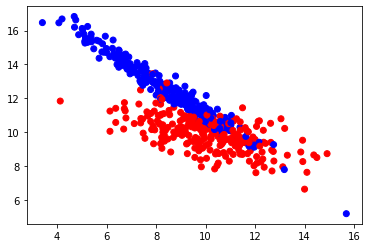

In [280]:
colors=['red','blue']
plt.scatter(x=X[:,0],y=X[:,1],c=Y,cmap=matplotlib.colors.ListedColormap(colors))

In [268]:
d = {'x1':X[:,0],'x2':X[:,1],'y':Y}
data= pd.DataFrame(d)
train = data.iloc[:250]
test = data.iloc[250:]

In [274]:
model = LogReg(dataframe=train,y_column='y')

In [275]:
model.train_model(iterations=2000,lr=0.05)

0.7124505285748574
0.672493235939779
0.6573404776470541
0.6475494882820294
0.638500804939089
0.6291703356855817
0.6193900661133874
0.609203285758757
0.5987113767343238
0.5880339245805198
0.5772943544097057
0.566611576816591
0.5560939140911036
0.5458348985514719
0.5359109450887402
0.5263807282162867
0.5172859117414162
0.5086528029750086
0.5004945230797833
0.4928133608111363
0.48560307159592847
0.4788509733097111
0.472539762361227
0.46664902568514355
0.46115645782075043
0.4560388112952569
0.45127261720675893
0.44683471482678616
0.44270262698574825
0.43885481391195763
0.4352708333313501
0.4319314297595455
0.4288185714399495
0.42591544948475407
0.4232064505070528
0.42067711136315306
0.4183140624889265
0.41610496463381313
0.4140384424920521
0.4121040177307072


In [278]:
score = 0
count = 0
test_probs = []
for idx,row in test.iterrows():
    x_vars = row[:-1]
    y_true = row[-1]
    y_pred = model.predict(x_vars)
    if y_pred == y_true:
        score+=1
    test_probs.append(model.predict_prob(x_vars))
    count +=1
print(f"accuracy: {score/count}")

accuracy: 0.868
